In [4]:
import pandas as pd
import numpy as np

import copy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [5]:
def createdf(filename): #створення фрейму
    df = pd.read_csv(filename)
    
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df.isnull().any()
    return(df)

In [9]:
df = createdf("csv//sorted_filled_test.csv")

In [10]:
print(str(df.shape[0]) +" rows x " + str(df.shape[1]) + " columns")
df.head()

23357 rows x 9 columns


,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model,Subscription Premium Cancel
0,0006869712ec9841dc36234bce245203,MD,Add Payment Method Success,"{""Payment Method"":""Debit"",""Tokenized Pay"":""""}",2022-01-19 18:47:45,android,samsung,SM-A716U,0
1,0006869712ec9841dc36234bce245203,MD,Subscription Premium,"{""Start Date"":""2022-01-19"",""Renewal Date"":""202...",2022-01-19 18:48:01,android,samsung,SM-A716U,0
2,0006869712ec9841dc36234bce245203,MD,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",2022-01-19 18:48:08,android,samsung,SM-A716U,0
3,0006869712ec9841dc36234bce245203,MD,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",2022-01-19 18:48:44,android,samsung,SM-A716U,0
4,0006869712ec9841dc36234bce245203,MD,Add Vehicle Success,"{""Make"":""Chevrolet"",""Model"":""Express 3500"",""Co...",2022-01-19 18:50:34,android,samsung,SM-A716U,0


In [8]:
print(df.groupby(['event_name'])['event_name'].count())

event_name
Account History Transaction Details    1609
Account Setup Profile Skip              498
Account Setup Skip                      222
Add Payment Method Failed               334
Add Payment Method Success             1038
Add Vehicle Break                       486
Add Vehicle Failed                       21
Add Vehicle Success                    1923
Calculator Used                         120
Calculator View                         630
Chat Conversation Opened               1485
Chat Conversation Started              1202
Email Confirmation Success              853
Order                                  6116
Reset Password Set                        1
Sign Out                                595
Sign Up Error                            26
Sign Up Success                        3329
Subscription Premium                    711
Subscription Premium Cancel             271
Subscription Premium Renew              310
Transaction Refund                      102
Wallet Opened        

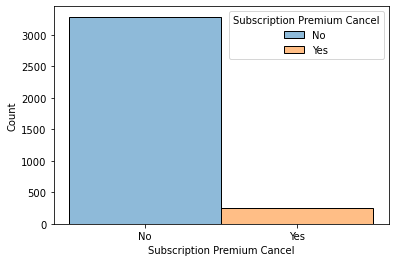

In [26]:
data = copy.deepcopy(df.drop_duplicates(subset = ["userid"]))
def for_hist(row):
    if row["Subscription Premium Cancel"] == 1:
        return "Yes"
    else:
        return "No"
data["Subscription Premium Cancel"] = data.apply(for_hist, axis=1)
sns.histplot(data = data, x = "Subscription Premium Cancel", hue = "Subscription Premium Cancel")
plt.show()

In [27]:
df_static_data = createdf("csv//static_data.csv")

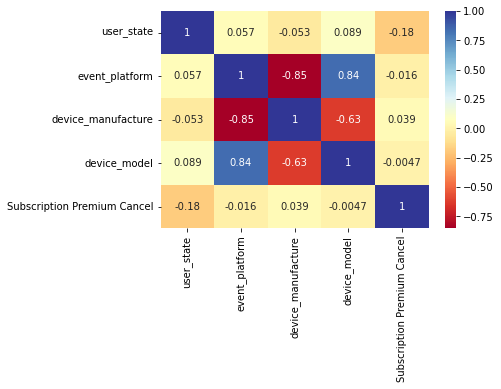

In [28]:
dataplot = sns.heatmap(df_static_data.corr(), cmap="RdYlBu", annot=True)
plt.show()